In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# %load turtle.py
from collections import namedtuple
from math import sin, cos, pi
import matplotlib.pyplot as plt

Point = namedtuple('Point', 'x y')
degree = pi / 180.0

class Turtle(object):
    def __init__(self, terrarium):
        self.pos = Point(0, 0)
        self.angle = 0
        self.pen = True
        self.axes = terrarium.axes
    
    def forward(self, distance):
        newx = self.pos.x + distance * cos(self.angle * degree)
        newy = self.pos.y + distance * sin(self.angle * degree)
        
        if self.pen: 
            line = plt.Line2D((self.pos.x, newx), (self.pos.y, newy))
            self.axes.add_line(line)

        self.pos = Point(newx, newy)
        return self.pos

    def backward(self, distance):
        return self.forward(-distance)

    def left(self, angle):
        self.angle = (self.angle + angle) % 360

    def right(self, angle):
        self.left(-angle)

    def pendown(self):
        self.pen = True

    def penup(self):
        self.pen = False

    
class Terrarium(object):
    def __init__(self, size = (3, 3)):
        # initialize figure
        self.fig = plt.figure(figsize = (5, 5))
        self.axes = plt.axes()
        # remove axis ticks and labels
        self.axes.set_xticks([])
        self.axes.set_yticks([])
        # make border transparent
        for side in ['bottom', 'top', 'left', 'right']:
            self.axes.spines[side].set_color('0.9')
    
    def rescale(self):
        self.axes.axis('scaled')
        # add some buffer to border so that drawing is not touching the edge
        xmin, xmax, ymin, ymax = self.axes.axis()
        dx = (xmax - xmin) / 50
        self.axes.axis ([xmin-dx, xmax+dx, ymin-dx, ymax+dx])


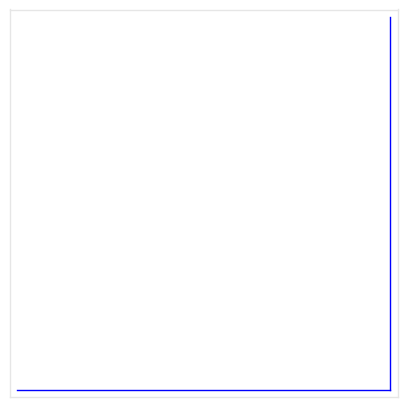

In [35]:
t = Terrarium()
t1 = Turtle(t)
t1.forward(100)
t1.left(90)
t1.forward(100)
t.rescale()